In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np

from matplotlib import pyplot

from scipy import optimize

%matplotlib inline

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

df = pd.read_csv('/content/drive/MyDrive/laboratorio2/adult.csv')


label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df['income'] = df['income'].replace({'<=50K': 0, '>50K': 1})


scaler = MinMaxScaler()
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])


X = df.drop('income', axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(df)

            age  workclass    fnlwgt  education  educational-num  \
0      0.109589      0.500  0.145129   0.066667         0.400000   
1      0.287671      0.500  0.052451   0.733333         0.533333   
2      0.150685      0.250  0.219649   0.466667         0.733333   
3      0.369863      0.500  0.100153   1.000000         0.600000   
4      0.013699      0.000  0.061708   1.000000         0.600000   
...         ...        ...       ...        ...              ...   
48837  0.136986      0.500  0.165763   0.466667         0.733333   
48838  0.315068      0.500  0.096129   0.733333         0.533333   
48839  0.561644      0.500  0.094462   0.733333         0.533333   
48840  0.068493      0.500  0.128004   0.733333         0.533333   
48841  0.479452      0.625  0.186482   0.733333         0.533333   

       marital-status  occupation  relationship  race  gender  capital-gain  \
0            0.666667    0.500000           0.6   0.5     1.0      0.000000   
1            0.333333    

In [ ]:
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (39073, 14)
Dimensiones de X_test: (9769, 14)
Dimensiones de y_train: (39073,)
Dimensiones de y_test: (9769,)


In [ ]:
def sigmoid(z):

    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [ ]:
def normalizarCaracteristicas(X_train, X_test):
    mu_train = np.mean(X_train, axis=0)
    sigma_train = np.std(X_train, axis=0)

    X_train_norm = (X_train - mu_train) / sigma_train
    X_test_norm = (X_test - mu_train) / sigma_train

    return X_train_norm, mu_train, sigma_train, X_test_norm

In [ ]:
X_train_norm, mu_train, sigma_train, X_test_norm = normalizarCaracteristicas(X_train, X_test)
print("Media calculada para el conjunto de entrenamiento:", mu_train)
print("Desviación estándar calculada para el conjunto de entrenamiento:", sigma_train)
print("Conjunto de entrenamiento normalizado:")
print(X_train_norm)
print("Conjunto de prueba normalizado:")
print(X_test_norm)


Media calculada para el conjunto de entrenamiento: age                0.296196
workclass          0.483387
fnlwgt             0.119986
education          0.686443
educational-num    0.605115
marital-status     0.435928
occupation         0.468952
relationship       0.287206
race               0.917673
gender             0.668979
capital-gain       0.010734
capital-loss       0.020488
hours-per-week     0.402328
native-country     0.896769
dtype: float64
Desviación estándar calculada para el conjunto de entrenamiento: age                0.187995
workclass          0.183229
fnlwgt             0.071309
education          0.258516
educational-num    0.171444
marital-status     0.250960
occupation         0.301984
relationship       0.320006
race               0.211253
gender             0.470581
capital-gain       0.074307
capital-loss       0.093245
hours-per-week     0.127120
native-country     0.188686
dtype: float64
Conjunto de entrenamiento normalizado:
            age  workclass    f

In [ ]:
m_train, n_train = X_train_norm.shape
m_test, n_test = X_test_norm.shape

X_train_norm = np.concatenate([np.ones((m_train, 1)), X_train_norm], axis=1)
X_test_norm = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)

In [ ]:
print("Conjunto de entrenamiento normalizado:")
print(X_train_norm)
print("Conjunto de prueba normalizado:")
print(X_test_norm)

Conjunto de entrenamiento normalizado:
[[ 1.          0.24612343  0.09066864 ... -0.21972585 -0.03437007
   0.28858012]
 [ 1.          0.97479439  1.45508069 ... -0.21972585 -0.4357274
   0.28858012]
 [ 1.         -0.33681334 -1.27374341 ... -0.21972585 -0.03437007
   0.28858012]
 ...
 [ 1.         -0.77401591  0.09066864 ... -0.21972585 -0.03437007
   0.28858012]
 [ 1.          0.53759181  2.13728672 ... -0.21972585 -0.03437007
   0.28858012]
 [ 1.          1.48486406  0.09066864 ... -0.21972585 -2.68332844
   0.28858012]]
Conjunto de prueba normalizado:
[[ 1.          1.26626277  0.09066864 ... -0.21972585 -0.03437007
   0.28858012]
 [ 1.         -0.9926172   0.09066864 ... -0.21972585 -0.03437007
   0.28858012]
 [ 1.          0.31899052  0.09066864 ... -0.21972585 -0.03437007
   0.28858012]
 ...
 [ 1.         -0.9926172  -1.27374341 ... -0.21972585 -0.194913
   0.28858012]
 [ 1.         -1.50268687  0.09066864 ... -0.21972585 -1.23844205
   0.28858012]
 [ 1.          0.97479439  0.0

In [ ]:
def calcularCosto(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return J

theta = np.zeros(X_train_norm.shape[1])


costo_entrenamiento = calcularCosto(theta, X_train_norm, y_train)


costo_prueba = calcularCosto(theta, X_test_norm, y_test)


print("Costo en el conjunto de entrenamiento:", costo_entrenamiento)
print("Costo en el conjunto de prueba:", costo_prueba)

Costo en el conjunto de entrenamiento: 0.6931471805599382
Costo en el conjunto de prueba: 0.6931471805599468


In [ ]:
def descensoGradiente(theta, X, y, alpha, num_iters):

    m = y.shape[0]

    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-0.75356738 -0.75356738  0.46505234 -0.03512622  0.05525113  0.07741798
  0.84187652 -0.34218124  0.05142876 -0.22420376  0.07675668  0.40045319
  2.25359882  0.27264873  0.35829612  0.01995782]


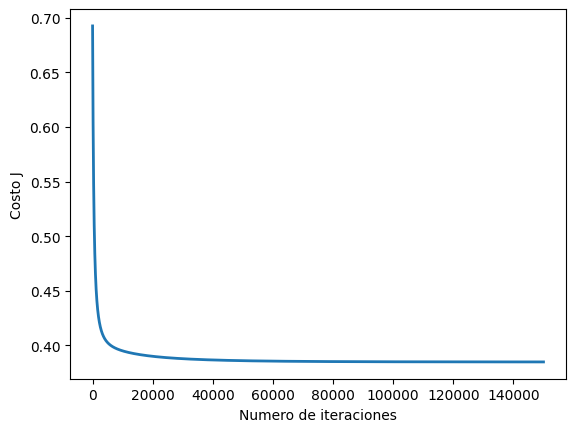

In [ ]:

alpha = 0.003
num_iters = 150000


theta = np.zeros(X_train_norm.shape[1])
theta, J_history = descensoGradiente(theta, X_train_norm, y_train, alpha, num_iters)


pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')


print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [ ]:
print(theta)
print (X_train_norm)
print (X_train_norm.shape)
print (y_train.shape)

[-0.75356738 -0.75356738  0.46505234 -0.03512622  0.05525113  0.07741798
  0.84187652 -0.34218124  0.05142876 -0.22420376  0.07675668  0.40045319
  2.25359882  0.27264873  0.35829612  0.01995782]
[[ 1.          1.          0.24612343 ... -0.21972585 -0.03437007
   0.28858012]
 [ 1.          1.          0.97479439 ... -0.21972585 -0.4357274
   0.28858012]
 [ 1.          1.         -0.33681334 ... -0.21972585 -0.03437007
   0.28858012]
 ...
 [ 1.          1.         -0.77401591 ... -0.21972585 -0.03437007
   0.28858012]
 [ 1.          1.          0.53759181 ... -0.21972585 -0.03437007
   0.28858012]
 [ 1.          1.          1.48486406 ... -0.21972585 -2.68332844
   0.28858012]]
(39073, 16)
(39073,)


In [ ]:
print(theta)
print (X_test_norm)
print (X_test_norm.shape)
print (y_test.shape)

[-0.75356738 -0.75356738  0.46505234 -0.03512622  0.05525113  0.07741798
  0.84187652 -0.34218124  0.05142876 -0.22420376  0.07675668  0.40045319
  2.25359882  0.27264873  0.35829612  0.01995782]
[[ 1.          1.          1.26626277 ... -0.21972585 -0.03437007
   0.28858012]
 [ 1.          1.         -0.9926172  ... -0.21972585 -0.03437007
   0.28858012]
 [ 1.          1.          0.31899052 ... -0.21972585 -0.03437007
   0.28858012]
 ...
 [ 1.          1.         -0.9926172  ... -0.21972585 -0.194913
   0.28858012]
 [ 1.          1.         -1.50268687 ... -0.21972585 -1.23844205
   0.28858012]
 [ 1.          1.          0.97479439 ... -0.21972585 -0.03437007
   0.28858012]]
(9769, 16)
(9769,)


In [ ]:
def predecir(theta, X):

    probabilidades = sigmoid(X.dot(theta))

    clases_predichas = (probabilidades >= 0.5).astype(int)
    return clases_predichas

def evaluar_predicciones(theta, X, y):

    clases_predichas = predecir(theta, X)

    precision = np.mean(clases_predichas == y) * 100

    correctas = np.sum(clases_predichas == y)
    incorrectas = np.sum(clases_predichas != y)
    return precision, correctas, incorrectas


precision, correctas, incorrectas = evaluar_predicciones(theta, X_test_norm, y_test)

incorrectas_porcentaje = 100 - precision


print("Precisión de las predicciones:", precision, "%")
print("Porcentaje de predicciones incorrectas:", incorrectas_porcentaje, "%")
print("Número de predicciones correctas:", correctas)
print("Número de predicciones incorrectas:", incorrectas)

Precisión de las predicciones: 82.7515610604975 %
Porcentaje de predicciones incorrectas: 17.248438939502506 %
Número de predicciones correctas: 8084
Número de predicciones incorrectas: 1685
